In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
with open("e1", "r") as f:
    ref = f.readlines()
    
ref = [[int(x) for x in row.strip()] for row in ref[2:]]
ref = np.array(ref)

In [4]:
correct_for_each_contestant = np.sum(ref, axis=1)

In [5]:
correct_for_each_question = np.sum(ref, axis=0)

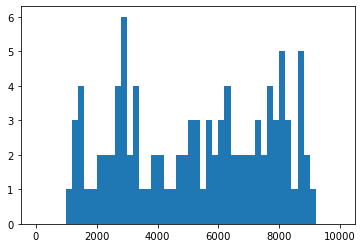

In [6]:
plt.hist(correct_for_each_contestant, bins=np.linspace(0,10000,51))
plt.show()

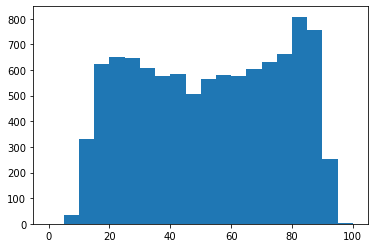

In [7]:
plt.hist(correct_for_each_question, bins=np.linspace(0,100,21))
plt.show()

In [8]:
ref

array([[0, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [9]:
# estimate the difficulty of each question
# estimate the skill_level of each participant
# logloss

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logloss(preds, ref):
    assert preds.shape == ref.shape
    return (1-ref)*np.log(1-preds) + (ref)*np.log(preds)

In [28]:
skills = np.zeros(100)
difficulties = np.zeros(10000)

In [46]:
def loss_calculation(inp_arr):
    skills, difficulties = inp_arr[:100], inp_arr[-10000:]
    preds = sigmoid(np.subtract.outer(skills, difficulties))
    return -np.sum(logloss(preds, ref))

In [47]:
loss_calculation(np.concatenate((skills, difficulties)))

693147.1805599461

In [49]:
minimize(loss_calculation, np.zeros(100+10000), options={"maxiter":1})

      fun: 669994.8371538379
 hess_inv: array([[ 9.91218544e-01, -1.12934412e-02,  6.59850733e-03, ...,
        -9.05785664e-06, -1.09966636e-05, -9.90840703e-06],
       [-1.12934412e-02,  9.85476007e-01,  8.48605362e-03, ...,
        -1.16538235e-05, -1.41148580e-05, -1.27399746e-05],
       [ 6.59850733e-03,  8.48605362e-03,  9.95041837e-01, ...,
         6.76745438e-06,  8.47950807e-06,  7.46729144e-06],
       ...,
       [-9.05785664e-06, -1.16538235e-05,  6.76745438e-06, ...,
         1.00000002e+00, -1.91827672e-07, -2.85449303e-08],
       [-1.09966636e-05, -1.41148580e-05,  8.47950807e-06, ...,
        -1.91827672e-07,  1.00000099e+00,  8.99715225e-08],
       [-9.90840703e-06, -1.27399746e-05,  7.46729144e-06, ...,
        -2.85449303e-08,  8.99715225e-08,  9.99999999e-01]])
      jac: array([ 2.02079688e+03,  2.59951562e+03, -1.51326562e+03, ...,
       -2.24218750e+00,  2.67031250e+01,  4.73437500e+00])
  message: 'Maximum number of iterations has been exceeded.'
     nfev